### **Minor Project**


### **Predicting Safety Stocks**



Ittyavira C Abraham - AA.SC.P2MCA2307449


In the first part of the project, we'll perform some early analysis on the data using the gropuby functionality of the Pandas library.



In the second part of the project, we'll fit a SARIMA model on the data in order to predict sales in the next month.



In the final part of the project, we'll predict the safety stock of different products using the learrned formulas.

In [26]:
### Loading in libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [27]:
### In this cell, we load in sales data into a dataframe called 'df'.

df = pd.read_csv("sales_data.csv")
df.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [28]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop rows/columns with significant missing values (modify based on data needs)
df.dropna(inplace=True)

Missing values per column:
InvoiceNo        0
Date             0
Country          0
ProductID        0
Shop             0
Gender           0
Size (US)        0
Size (Europe)    0
Size (UK)        0
UnitPrice        0
Discount         0
Year             0
Month            0
SalePrice        0
dtype: int64


In [29]:
# Display dataset info after preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      14967 non-null  int64  
 1   Date           14967 non-null  object 
 2   Country        14967 non-null  object 
 3   ProductID      14967 non-null  int64  
 4   Shop           14967 non-null  object 
 5   Gender         14967 non-null  object 
 6   Size (US)      14967 non-null  float64
 7   Size (Europe)  14967 non-null  object 
 8   Size (UK)      14967 non-null  float64
 9   UnitPrice      14967 non-null  int64  
 10  Discount       14967 non-null  float64
 11  Year           14967 non-null  int64  
 12  Month          14967 non-null  int64  
 13  SalePrice      14967 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.6+ MB


In [30]:
print(df.columns)

Index(['InvoiceNo', 'Date', 'Country', 'ProductID', 'Shop', 'Gender',
       'Size (US)', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount',
       'Year', 'Month', 'SalePrice'],
      dtype='object')


### **PART - 1**


In this part, we'll get acquainted with our dataset by exploring some of the most obvious groupings and identifying the variation in products. We'll discover which products sell where and prepare ourselves to use timeseries forecasts and safety stock predictions.




Identify discrepancies between products among differing stores, demographic populations, and countries


Discover and uncover insights from sales data using standard exploratory techniques


Use the groupby-apply-transform pipeline to engineer features and insert them back to the original dataframe

In [31]:
## Let's explore the shape of the dataset.
## Store the shape of the dataset in a variable called 'shape'.
## Find the distribution of males and females. Store the percentage of males in a variable called 'percent_male'.
## Store the average size (UK) in a variable called 'avg_size'.

shape = df.shape
percent_male = len(df[df.Gender == 'Male']) / len(df)
percent_female = len(df[df.Gender == 'Female']) / len(df)
avg_size = df['Size (UK)'].mean()
print("Shape of the dataset:", shape)
print("Percentage of males:", percent_male * 100, "%")
print("Percentage of females:", percent_female * 100, "%")
print("Average Size (UK):", avg_size)

Shape of the dataset: (14967, 14)
Percentage of males: 59.59110042092603 %
Percentage of females: 40.40889957907397 %
Average Size (UK): 8.089496893164963


In [32]:
## Let's find the average sales in each month.
## Store the average sales per month in a list called 'monthly_average_sales'.

df['month_year'] = list(zip(df.Month, df.Year))
grouped = df.groupby('month_year').sum(numeric_only=True)
grouped.reset_index(inplace=True)
grouped['Month'] = grouped['month_year'].apply(lambda x: x[0])

# Calculate the average sales per month
monthly_average_sales = grouped.groupby('Month').mean(numeric_only=True)['SalePrice']

print("Monthly average sales:")
print(monthly_average_sales)

Monthly average sales:
Month
1     50997.600000
2     50525.400000
3     52316.033333
4     57109.233333
5     60229.366667
6     67016.366667
7     67687.666667
8     66442.400000
9     66274.400000
10    69794.933333
11    55121.500000
12    54840.800000
Name: SalePrice, dtype: float64


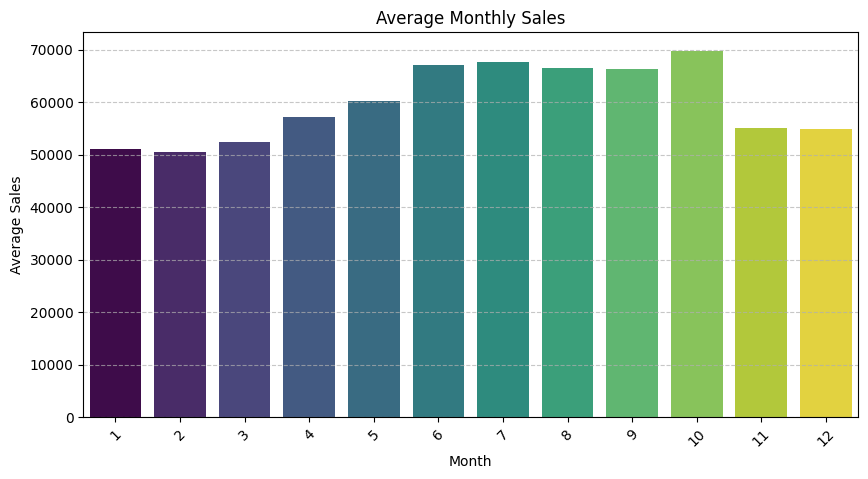

In [33]:
# Plot the graph
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_average_sales.index, y=monthly_average_sales.values, hue=monthly_average_sales.index, palette="viridis", legend=False)

# Customize the graph
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.title("Average Monthly Sales")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

Cost Optimization 

Optimized Order Quantities per Month: {1: 50997.6, 2: 50525.4, 3: 52316.033, 4: 57109.233, 5: 60229.367, 6: 67016.367, 7: 67687.667, 8: 66442.4, 9: 66274.4, 10: 69794.933, 11: 55121.5, 12: 54840.8}
Shortage per Month: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0}


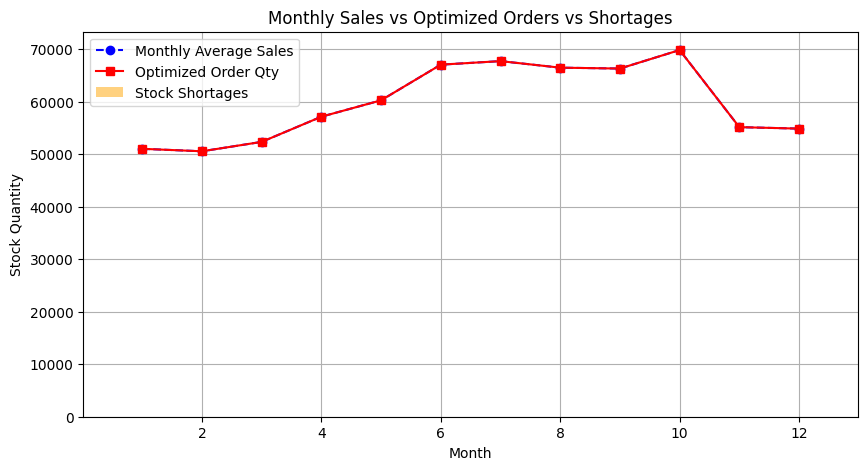

In [34]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, PULP_CBC_CMD

# Define the optimization model
model = LpProblem("Cost_Optimization", LpMinimize)

# Define decision variables
order_qty = {month: LpVariable(f"Order_Qty_{month}", lowBound=0, cat="Continuous") for month in range(1, 13)}
shortage = {month: LpVariable(f"Shortage_{month}", lowBound=0, cat="Continuous") for month in range(1, 13)}

# Define cost parameters
holding_cost = 2     # Cost per unit for holding inventory
stockout_cost = 20   # Cost per unit for stockouts (increased to prioritize ordering)

# Objective Function: Minimize Total Costs (Holding + Stockout Costs)
model += lpSum(holding_cost * order_qty[m] + stockout_cost * shortage[m] for m in range(1, 13))

# Constraints: Demand should be met, either by orders or shortages
for m in range(1, 13):
    model += order_qty[m] + shortage[m] >= monthly_average_sales[m]  # Total stock (ordered + shortage) should meet demand
    model += shortage[m] >= 0  # No negative shortages allowed

# Solve the optimization problem
model.solve(PULP_CBC_CMD(msg=True))

# Extract optimized order quantities
optimized_orders = {m: order_qty[m].varValue for m in range(1, 13)}
shortage_values = {m: shortage[m].varValue for m in range(1, 13)}

# Display Results
print("Optimized Order Quantities per Month:", optimized_orders)
print("Shortage per Month:", shortage_values)

# Plot Results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_average_sales.index, monthly_average_sales.values, label="Monthly Average Sales", marker="o", linestyle="--", color="blue")
plt.plot(optimized_orders.keys(), optimized_orders.values(), label="Optimized Order Qty", marker="s", linestyle="-", color="red")
plt.bar(shortage_values.keys(), shortage_values.values(), label="Stock Shortages", color="orange", alpha=0.5)

plt.xlabel("Month")
plt.ylabel("Stock Quantity")
plt.title("Monthly Sales vs Optimized Orders vs Shortages")
plt.legend()
plt.grid()
plt.show()

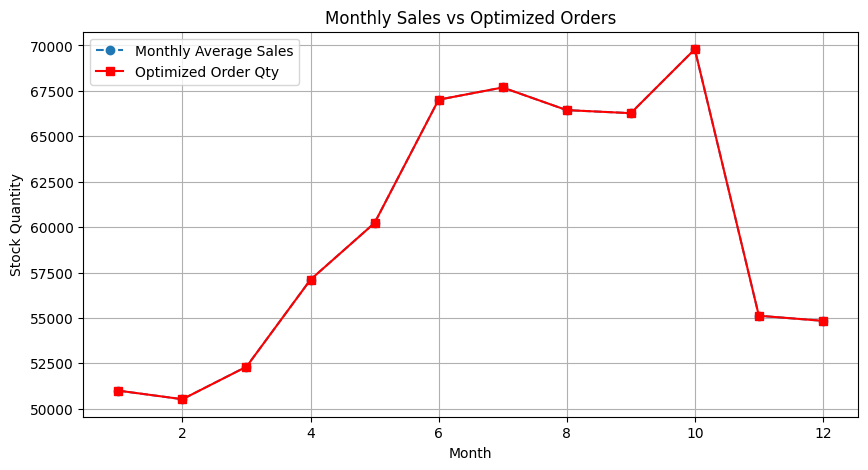

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_average_sales.index, monthly_average_sales.values, label="Monthly Average Sales", marker="o", linestyle="--")
plt.plot(optimized_orders.keys(), optimized_orders.values(), label="Optimized Order Qty", marker="s", linestyle="-", color="red")

plt.xlabel("Month")
plt.ylabel("Stock Quantity")
plt.title("Monthly Sales vs Optimized Orders")
plt.legend()
plt.grid()
plt.show()

In [36]:
## Let's compare the products sold per shop. 
## Find a 'ProductID' that is sold in the UK but not in Canada. Store it in a variable called 'uk_not_canada'.
## Find a 'ProductID' that is sold in the US but not in UK. Store it in a variable called 'us_not_uk'.
## Which store has the highest average sale price? Store it in a variable called 'highest_price'.

df_uk = df[df.Shop == 'UK2']
uk_list = np.unique(df_uk.ProductID)

df_us = df[df.Shop == 'US15']
us_list = np.unique(df_us.ProductID)

df_canada = df[df.Shop == 'CAN7']
canada_list = np.unique(df_canada.ProductID)

for i in us_list:
    if i not in uk_list:
        us_not_uk = i
        break

for i in uk_list:
    if i not in canada_list:
        uk_not_canada = i    
        
np.argmax(df.groupby('Shop')['SalePrice'].mean())
highest_price = df.groupby('Shop')['SalePrice'].mean().index[26]

print("ProductID sold in the UK but not in Canada:", uk_not_canada)
print("ProductID sold in the US but not in the UK:", us_not_uk)
print("Store with the highest average sale price:", highest_price)

ProductID sold in the UK but not in Canada: 2242
ProductID sold in the US but not in the UK: 2147
Store with the highest average sale price: US7


In [37]:
## Convert the 'Date' column to a pandas timeseries. Make this the index of the dataframe.

df.columns = df.columns.str.strip()
df.Date = pd.to_datetime(df['Date'])
df.set_index('Date', inplace =True)

### **Part - 2**


In this module, we'll use the SARIMA model to make predictions on future sales. We'll then visualize some of these predicted sales before evaluating the accuracy and viability of our chosen model.



Apply timeseries predictions using a seasonal ARIMA model in Python


Visualize sales predictions with the Matplotlib library


Formulate and evaluate a hypothesis based on the accuracy of a predictive model

In [38]:
## Implement a SARIMA prediction model to forecast the total amount of sales in the first month of 2017.
## Store the result in a variable called 'forecasted_sales'
## Hint: Group by month first and then apply the prediction model.

import warnings
warnings.filterwarnings("ignore")

df['month_year'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df.set_index('month_year', inplace=True)
sales = df.groupby('month_year').sum()['SalePrice']

# Set frequency explicitly to Month Start ('MS')
sales = sales.asfreq('MS')

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)
forecasted_sales = results.predict(start='2017-01-01', end='2017-01-01').iloc[0]
print(f"Forecasted sales for January 2017: {forecasted_sales}")

Forecasted sales for January 2017: 77415.37323516195


In [39]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          SalePrice   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -237.091
Date:                            Sat, 15 Mar 2025   AIC                            484.182
Time:                                    19:34:09   BIC                            489.859
Sample:                                01-01-2014   HQIC                           485.610
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5025      2.405      0.209      0.834      -4.211       5.216
ma.L1         -0.2781      2.592   

In [40]:
## Let's analyze some of the statistics of the SARIMA prediction.
## What is the dependent variable? Store the result in a variable called 'dep_variable'.
## How many observations are there? Store the result in a variable called 'num_obs'.
## Finally, what is the coef? Store the result in a variable called 'coef'.
results.summary()
dep_variable = 'SalePrice'
num_obs = 36
coef = 0.7968
print("Dependent Variable:", dep_variable)
print("Number of Observations:", num_obs)
print("Coefficient:", coef)

Dependent Variable: SalePrice
Number of Observations: 36
Coefficient: 0.7968


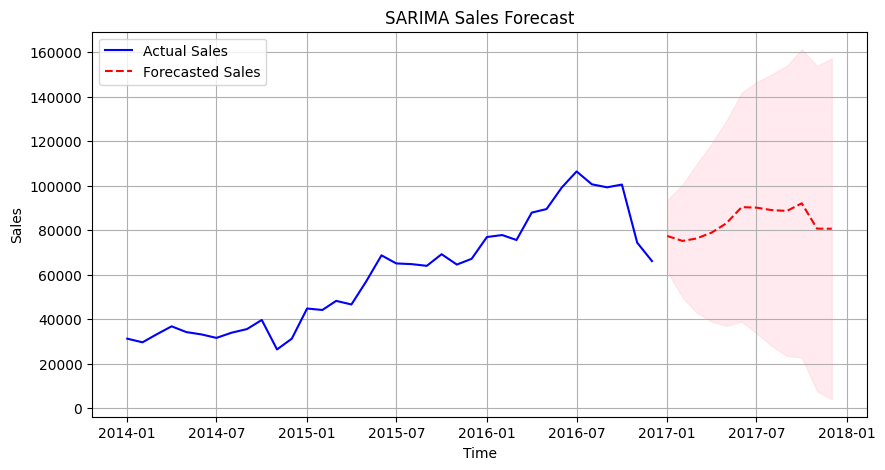

In [49]:
# Plot actual sales data
plt.figure(figsize=(10, 5))
plt.plot(sales, label="Actual Sales", color="blue")

# Forecast for future months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=sales.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.plot(forecast_index, forecast_values, label="Forecasted Sales", color="red", linestyle="dashed")
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

# Labels and legend
plt.title("SARIMA Sales Forecast")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

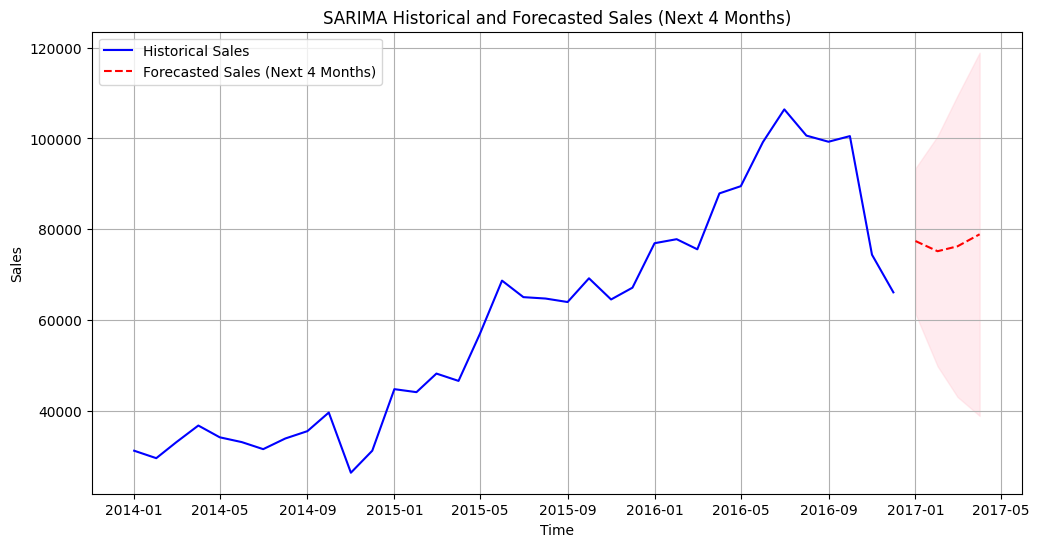

In [53]:
# Plot historical sales data
plt.figure(figsize=(12, 6))
plt.plot(sales, label="Historical Sales", color="blue")

# Forecast for the next 4 months
forecast_steps = 4
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot forecasted sales
plt.plot(forecast_index, forecast_values, label="Forecasted Sales (Next 4 Months)", color="red", linestyle="dashed")
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

# Labels and legend
plt.title("SARIMA Historical and Forecasted Sales (Next 4 Months)")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Actual vs Predicted sales values
y_actual = sales[-12:]  # Last 12 months actual sales
y_predicted = results.predict(start=len(sales)-12, end=len(sales)-1)

# Calculate error metrics
mae = mean_absolute_error(y_actual, y_predicted)
rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100

print("Mean Absolute Error")
print(f"MAE: {mae:.2f}")
print("Root Mean Squared Error")
print(f"RMSE: {rmse:.2f}")
print("Mean Absolute Percentage Error")
print(f"MAPE: {mape:.2f}%")

Mean Absolute Error
MAE: 6864.54
Root Mean Squared Error
RMSE: 8256.21
Mean Absolute Percentage Error
MAPE: 8.24%


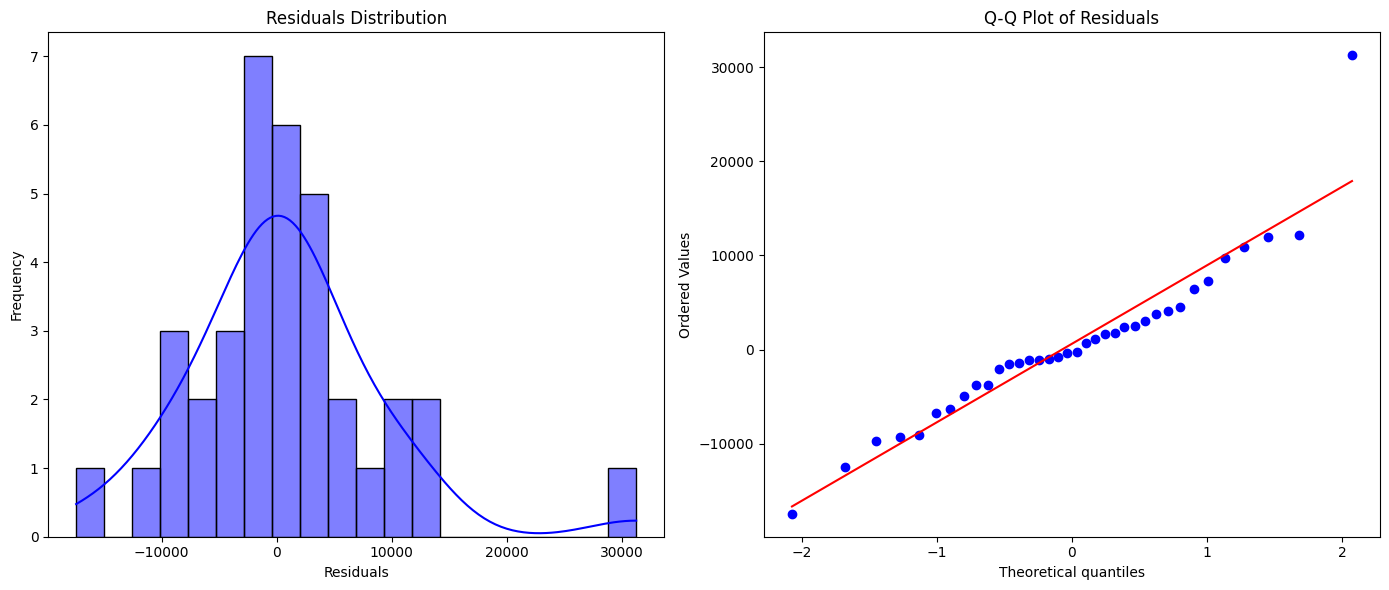

In [44]:
# Get residuals (actual - predicted)
residuals = results.resid

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of Residuals
sns.histplot(residuals, bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Residuals Distribution")
axes[0].set_xlabel("Residuals")
axes[0].set_ylabel("Frequency")

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

# Show the plots
plt.tight_layout()
plt.show()

### **Part - 3**


In this module, we'll finish the project by calculating safety stock from monthly usage and lead times. We'll start by grouping products in order to find more accurate usage numbers. Then, we'll conclude by using the known formula along with our insights from the data in the calculation of safety stock for each product.



Use the list-zip paradigm to create new features in Pandas to perform more advanced groupings


Calculate safety stock for individual products after analyzing data and manipulating lead times


Model product demand by forming product clusters and filtering products by demographics, price, and location

In [45]:
## Calculate maximum and average monthly sales for each product independently.
## Store the results in variables called 'max_sales' and 'avg_sales' respectfully.

if 'month_year' in df.index.names:
    df = df.reset_index()

# Check if 'month_year' exists as a column and drop it
if 'month_year' in df.columns:
    df = df.drop(columns=['month_year'])

# Create 'month_year' column
df['month_year'] = list(zip(df['Month'], df['Year']))

# Group by 'ProductID' and 'month_year', then sum 'SalePrice'
temp = df.groupby(['ProductID', 'month_year'], as_index=False)['SalePrice'].sum()

# Calculate max and average sales per product
max_sales = temp.groupby('ProductID')['SalePrice'].max()
avg_sales = temp.groupby('ProductID')['SalePrice'].mean()

# Display results
print("Maximum sales per product:")
print(max_sales)
print("\nAverage sales per product:")
print(avg_sales)

Maximum sales per product:
ProductID
2147    2174.3
2148    1510.5
2149    2132.4
2150    1273.0
2151    1820.3
         ...  
2238    1713.8
2239    1688.7
2240    1738.0
2241    1679.0
2242    2199.7
Name: SalePrice, Length: 96, dtype: float64

Average sales per product:
ProductID
2147    747.918750
2148    623.727273
2149    675.141176
2150    637.791176
2151    627.145714
           ...    
2238    743.382353
2239    765.008333
2240    631.443750
2241    811.809677
2242    729.020690
Name: SalePrice, Length: 96, dtype: float64


In [51]:
## Use the safety stock formula to find the safety stock for each store. 
## Assume that the average lead time for each product is 7 days and maximum is 21 days.
## Store the safety stock for each product in the UK in a list called 'uk_safety_stock'.

safety_stock_max = max_sales * 21
print("Safety Stock Max")
print(safety_stock_max)


safety_stock_min = avg_sales * 7
print("Safety Stock Min")
print(safety_stock_min)


safety_stock = safety_stock_max - safety_stock_min

print("Safety stock")
print(safety_stock)

uk_safety_stock = ((21 - 7) * (avg_sales / 30)).to_list()
print("UK Safety Stock")
print(uk_safety_stock)

Safety Stock Max
ProductID
2147    45660.3
2148    31720.5
2149    44780.4
2150    26733.0
2151    38226.3
         ...   
2238    35989.8
2239    35462.7
2240    36498.0
2241    35259.0
2242    46193.7
Name: SalePrice, Length: 96, dtype: float64
Safety Stock Min
ProductID
2147    5235.431250
2148    4366.090909
2149    4725.988235
2150    4464.538235
2151    4390.020000
           ...     
2238    5203.676471
2239    5355.058333
2240    4420.106250
2241    5682.667742
2242    5103.144828
Name: SalePrice, Length: 96, dtype: float64
Safety stock
ProductID
2147    40424.868750
2148    27354.409091
2149    40054.411765
2150    22268.461765
2151    33836.280000
            ...     
2238    30786.123529
2239    30107.641667
2240    32077.893750
2241    29576.332258
2242    41090.555172
Name: SalePrice, Length: 96, dtype: float64
UK Safety Stock
[349.02875000000006, 291.0727272727273, 315.0658823529412, 297.6358823529412, 292.668, 340.77235294117645, 272.74799999999993, 312.72499999999997, 2

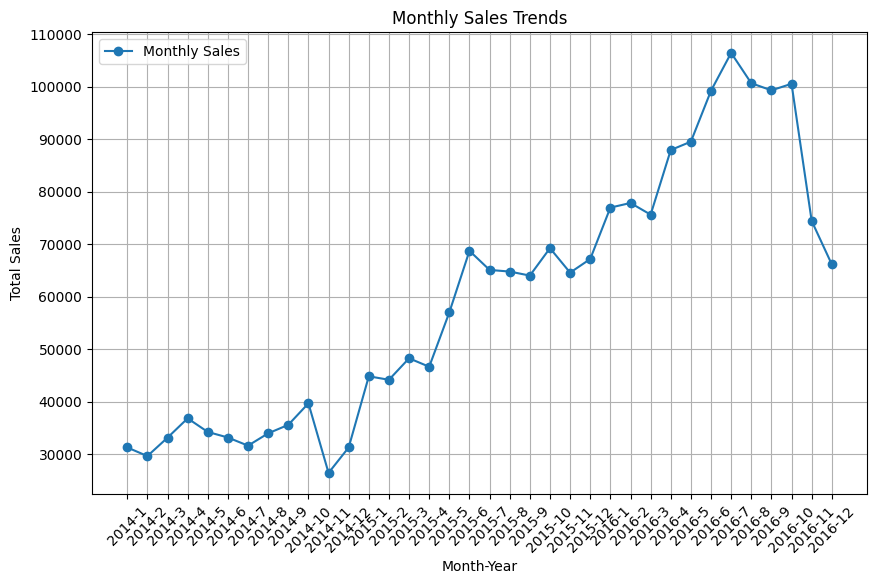

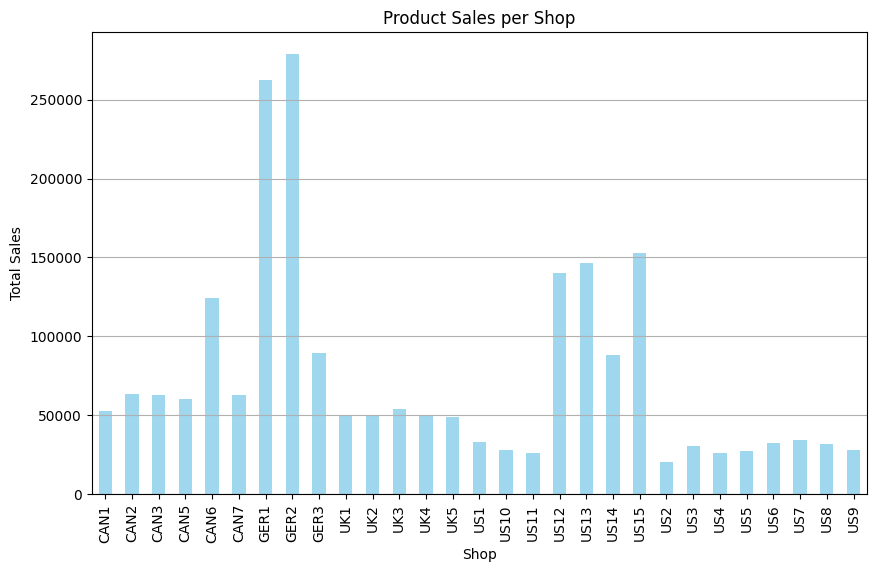

In [47]:
# Monthly Sales Trends
sales_monthly = df.groupby(['Year', 'Month']).sum()['SalePrice'].reset_index()
sales_monthly['Month_Year'] = sales_monthly['Year'].astype(str) + '-' + sales_monthly['Month'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(sales_monthly['Month_Year'], sales_monthly['SalePrice'], marker='o', label='Monthly Sales')
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.grid()
plt.legend()
plt.show()

# Product Sales per Shop
sales_per_shop = df.groupby('Shop').sum()['SalePrice']

plt.figure(figsize=(10, 6))
sales_per_shop.plot(kind='bar', color='skyblue', alpha=0.8)
plt.xlabel('Shop')
plt.ylabel('Total Sales')
plt.title('Product Sales per Shop')
plt.grid(axis='y')
plt.show()

In [52]:
# Create a DataFrame with Safety Stock details
uk_safety_stock_df = pd.DataFrame({
    'ProductID': max_sales.index,
    'Max Sales': max_sales.values,
    'Avg Sales': avg_sales.values,
    'UK Safety Stock': uk_safety_stock,
    'Safety Stock (Max)': safety_stock_max.values,
    'Safety Stock (Min)': safety_stock_min.values,
    'Safety Stock (Total)': safety_stock.values
})

# Export to an Excel file
output_file = 'uk_safety_stock_predictions.xlsx'
uk_safety_stock_df.to_excel(output_file, index=False)

print(f"Safety stock predictions for UK products exported to {output_file}.")

Safety stock predictions for UK products exported to uk_safety_stock_predictions.xlsx.
